# Visualisation des données : Utilisation de Matplotlib, Seaborn, Plotly pour représenter des données avec Python

## Démonstrations d'utilisation simple de Matplotlib, Seaborn et Plotly

Resources

Cheatsheets
- Plots
    - [plots_theory](https://www.psiweb.org/docs/default-source/2018-psi-conference-posters/48-julie-jones.pdf)
- Matplotlib
    - [Official matplotlib](https://github.com/matplotlib/cheatsheets)
        - [matplotlib 1.1](https://camo.githubusercontent.com/bc3b143766ed68eb6a851900c317c5d9222eb1471888942afb35137aa5141557/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f63686561747368656574732d312e706e67)
        - [matplotlib 2.1](https://camo.githubusercontent.com/8566d191963c2ada58246241d19a1252c519edea1ecf4049f5bc939e302e36a8/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f63686561747368656574732d322e706e67)
        - [matplotlib for beginners](https://camo.githubusercontent.com/b1b8838502a81077591ccadbf45dc45f2207637b41245e557198b680b0a2e662/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d626567696e6e65722e706e67)
    - By Datacamp
        - [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
        - [seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [plotly](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)

Kaggle Notebooks
- TODO add notebooks demonstrations for each package

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
# Data
x = range(1000)
y = np.random.randn(1000)
z = np.random.randn(1000)
cat = np.random.randint(low=0, high=3, size=1000)
colors = np.random.randint(low=0, high=5, size=1000)

df = pd.DataFrame({'x': x, 'y': y, 'colors': colors, 'cat': cat})

### Graphiques fondamentaux bruts

#### Line chart

Matplotlib

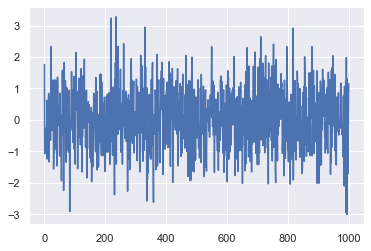

In [27]:
# From matplotlib.pyplot directly
plt.plot(y)

<AxesSubplot:xlabel='x'>

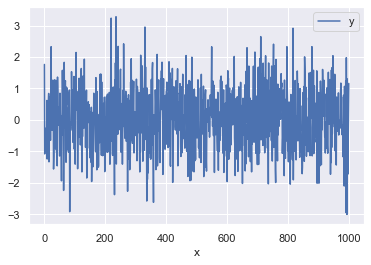

In [28]:
# From Pandas DataFrames
df.plot('x', 'y')

Seaborn

<AxesSubplot:xlabel='x', ylabel='y'>

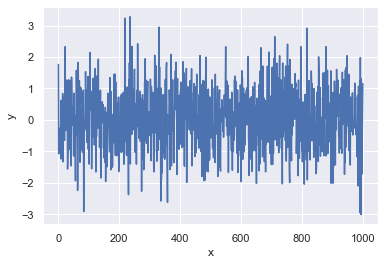

In [29]:
# Activate Seaborn nice theme (will also be activated for standard matplotlib graphs)
sns.set_theme()
sns.lineplot(data=df, x='x', y='y')

Plotly

In [30]:
# You can zoom and hover with the mouse to see data values
px.line(df, 'x', 'y')

#### Scatter plot

Matplotlib

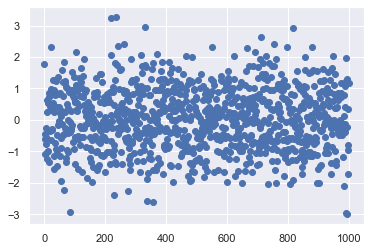

In [31]:
# From matplotlib.pyplot directly
plt.scatter(x, y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='x', ylabel='y'>

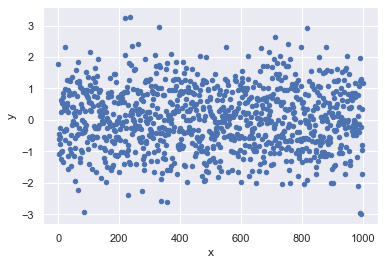

In [32]:
# From Pandas DataFrames
df.plot.scatter('x', 'y')

Seaborn

<AxesSubplot:xlabel='x', ylabel='y'>

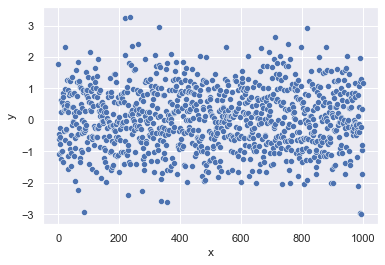

In [33]:
sns.scatterplot(data=df, x='x', y='y')

Plotly

In [34]:
px.scatter(df, x='x', y='y')

#### Histogram

Matplotlib

(array([  6.,  22.,  95., 183., 238., 204., 174.,  57.,  17.,   4.]),
 array([-3.00814799, -2.3791681 , -1.75018822, -1.12120833, -0.49222844,
         0.13675145,  0.76573133,  1.39471122,  2.02369111,  2.652671  ,
         3.28165088]),
 <BarContainer object of 10 artists>)

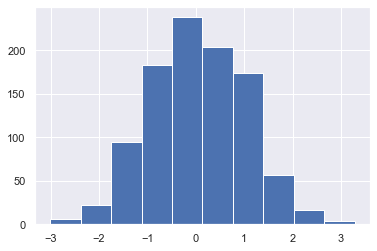

In [35]:
# From matplotlib.pyplot directly
plt.hist(y)

<AxesSubplot:>

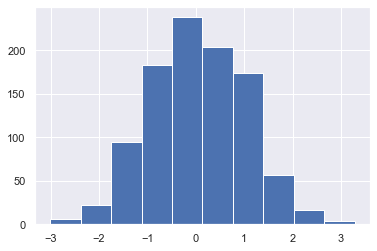

In [36]:
# From Pandas DataFrames
df['y'].hist()

Seaborn

<AxesSubplot:xlabel='y', ylabel='Count'>

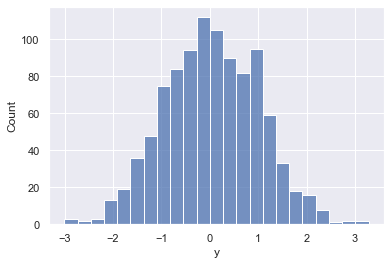

In [37]:
sns.histplot(df['y'])

Plotly

In [38]:
px.histogram(df['y'])

### Couleurs - Coloration des points de données

In [39]:
# Data
import random

colors_1 = ['b'] * 500 + ['r'] * 500
colors_2 = random.choices(['b', 'r'], k=1000)

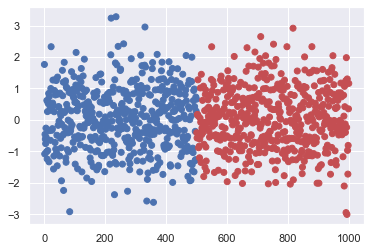

In [40]:
# From matplotlib.pyplot directly
plt.scatter(x, y, c=colors_1)

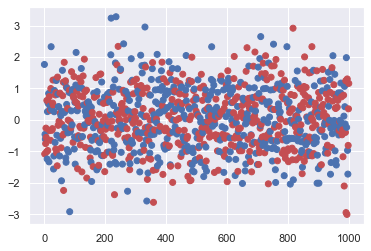

In [41]:
# From matplotlib.pyplot directly
plt.scatter(x, y, c=colors_2)

Comment est-ce que cela fonctionne ?
- La couleur est attribuée en fonction de sa position dans la liste
- Si un point de données (ici le chiffre 4) est en 3e position [9, 3, 4, 5, 8], alors la couleur qui lui sera attribuée sera en 3e position de la list des couleurs
- ex : ['b', 'b', 'r', 'b', 'b']

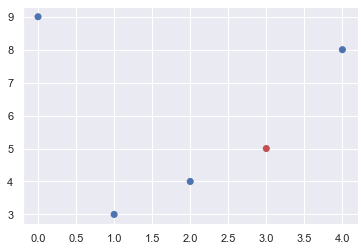

In [42]:
# Example simple
x_small = [0, 1, 2, 3, 4]
y_small = [9, 3, 4, 5, 8]
colors = ['b', 'b', 'b', 'r', 'b']
plt.scatter(x_small, y_small, c=colors)

### Taille des points de données

In [43]:
# Data
sizes_1 = [10] * 500 + [40] * 500
sizes_2 = random.choices([10, 40], k=1000)

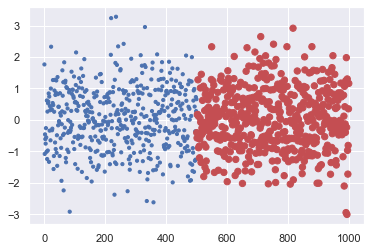

In [44]:
# From matplotlib.pyplot directly
plt.scatter(x, y, c=colors_1, s=sizes_1)

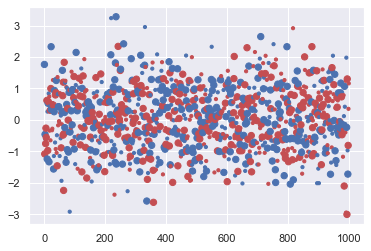

In [45]:
# From matplotlib.pyplot directly
plt.scatter(x, y, c=colors_2, s=sizes_2)

Comment est-ce que cela fonctionne ?
- De même que les couleurs, l'attribution dépend de la position relative dans la liste

### Markers - Type / forme des points de données

#### Marker identique sur l'ensemble des points

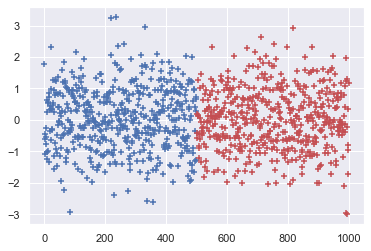

In [46]:
# From matplotlib.pyplot directly
plt.scatter(x, y, c=colors_1, marker='+')

#### Multiples markers
- Solution 0 (ne fonctionne pas) : définir une liste de markers
- Solution 1 (ne pas faire car inefficient) : plotter chaque point les uns après les autres
- Solution 2 : plotter un nouveau graph (avec ses points correspondants) pour chaque marker

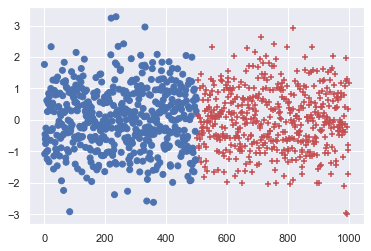

In [47]:
# Solution 2
plt.scatter(x[500:], y[500:], c=colors_1[500:], marker='+')
plt.scatter(x[:500], y[:500], c=colors_1[:500], marker='o')

## Graphiques spécifiques à chaque package

#### Matplotlib

#### Seaborn

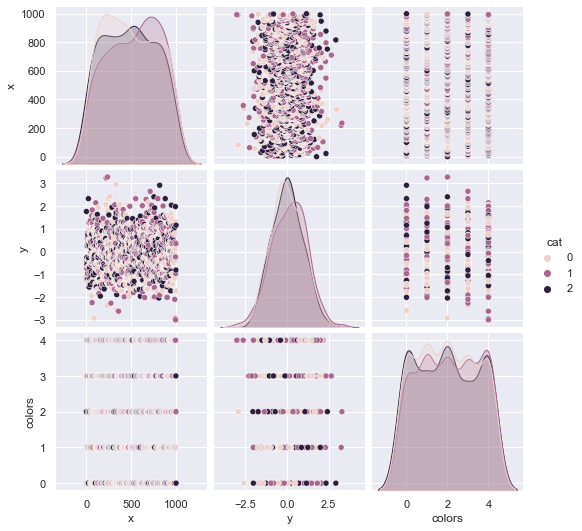

In [56]:
sns.pairplot(df, hue='cat', height=2.5)

#### Plotly

In [ ]:
import plotly.graph_objs as go

#### Missingno

In [ ]:
import missingno as msno

In [ ]:
# msno.matrix()
# mnso.bar()
# msno.heatmap()
# msno.dendrogram()

## Paramètres principaux des fonctions

## Construction d'un graphique avec Matplotlib en détail

### Multiple plots : "subplots"

#### Matplotlib

Création basique d'une figure avec plusieurs graphs "*subplots*"

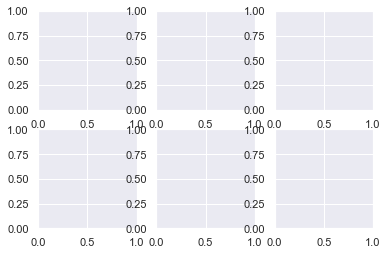

In [27]:
fig, axes = plt.subplots(2, 3)

Création basique d'une figure avec plusieurs graphs et une taille spécifique "*figsize*"

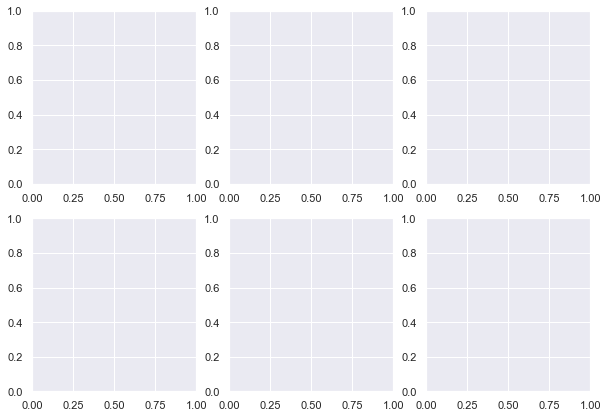

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

Ajout d'un premier graph (en haut à gauche)

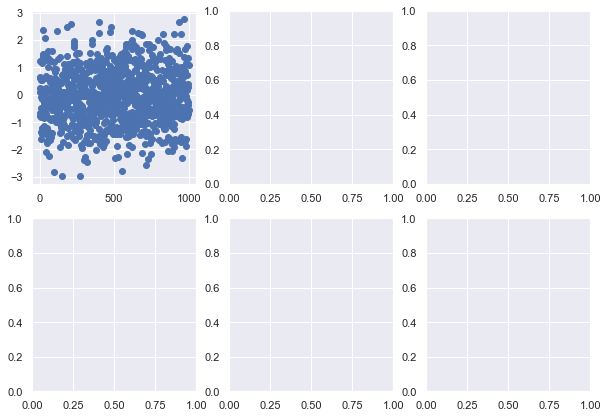

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes[0, 0].scatter(x, y)

Ajout de plusieurs graphs

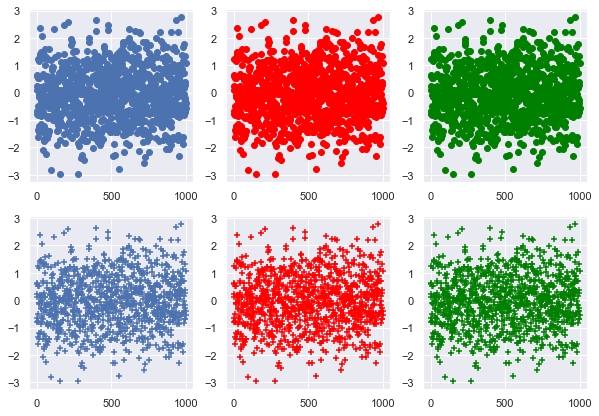

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
# Plots on first row
axes[0, 0].scatter(x, y)
axes[0, 1].scatter(x, y, c='red')
axes[0, 2].scatter(x, y, c='green')
# Plots on second row
axes[1, 0].scatter(x, y, marker='+')
axes[1, 1].scatter(x, y, marker='+', c='red')
axes[1, 2].scatter(x, y, marker='+', c='green')

Ajout d'un titre, et de labels

Text(0, 0.5, 'location')

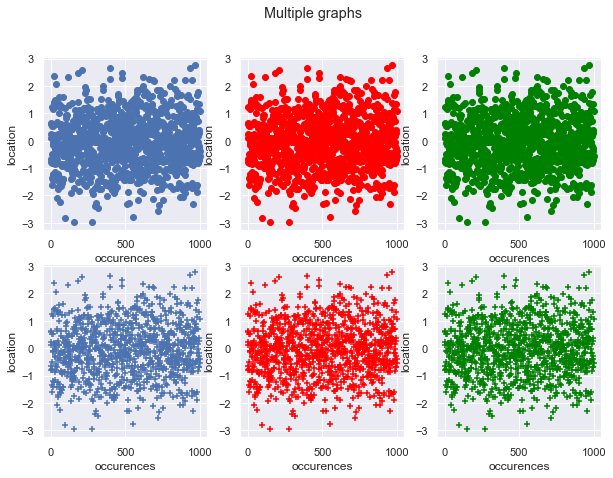

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
# Plots on first row
axes[0, 0].scatter(x, y)
axes[0, 1].scatter(x, y, c='red')
axes[0, 2].scatter(x, y, c='green')
# Plots on second row
axes[1, 0].scatter(x, y, marker='+')
axes[1, 1].scatter(x, y, marker='+', c='red')
axes[1, 2].scatter(x, y, marker='+', c='green')

# Title 
fig.suptitle('Multiple graphs')

# Label 1 (for top left plot)
axes[0, 0].set_xlabel('occurences')
axes[0, 0].set_ylabel('location')
# Label 2
axes[0, 1].set_xlabel('occurences')
axes[0, 1].set_ylabel('location')
# Label 3
axes[0, 2].set_xlabel('occurences')
axes[0, 2].set_ylabel('location')
# Label 4
axes[1, 0].set_xlabel('occurences')
axes[1, 0].set_ylabel('location')
# Label 5
axes[1, 1].set_xlabel('occurences')
axes[1, 1].set_ylabel('location')
# Label 6
axes[1, 2].set_xlabel('occurences')
axes[1, 2].set_ylabel('location')

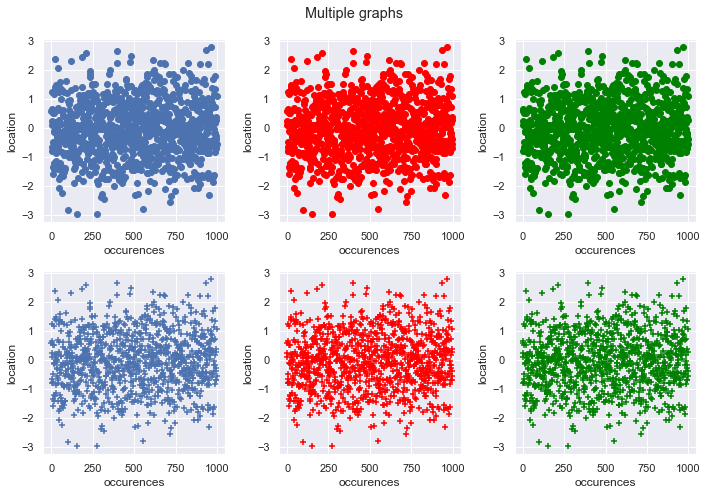

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
# Plots on first row
axes[0, 0].scatter(x, y)
axes[0, 1].scatter(x, y, c='red')
axes[0, 2].scatter(x, y, c='green')
# Plots on second row
axes[1, 0].scatter(x, y, marker='+')
axes[1, 1].scatter(x, y, marker='+', c='red')
axes[1, 2].scatter(x, y, marker='+', c='green')

# Title 
fig.suptitle('Multiple graphs')

# Label 1 (for top left plot)
axes[0, 0].set_xlabel('occurences')
axes[0, 0].set_ylabel('location')
# Label 2
axes[0, 1].set_xlabel('occurences')
axes[0, 1].set_ylabel('location')
# Label 3
axes[0, 2].set_xlabel('occurences')
axes[0, 2].set_ylabel('location')
# Label 4
axes[1, 0].set_xlabel('occurences')
axes[1, 0].set_ylabel('location')
# Label 5
axes[1, 1].set_xlabel('occurences')
axes[1, 1].set_ylabel('location')
# Label 6
axes[1, 2].set_xlabel('occurences')
axes[1, 2].set_ylabel('location')

fig.tight_layout()

Partage d'axe entre les graphs: "*sharex*", "*sharey*"

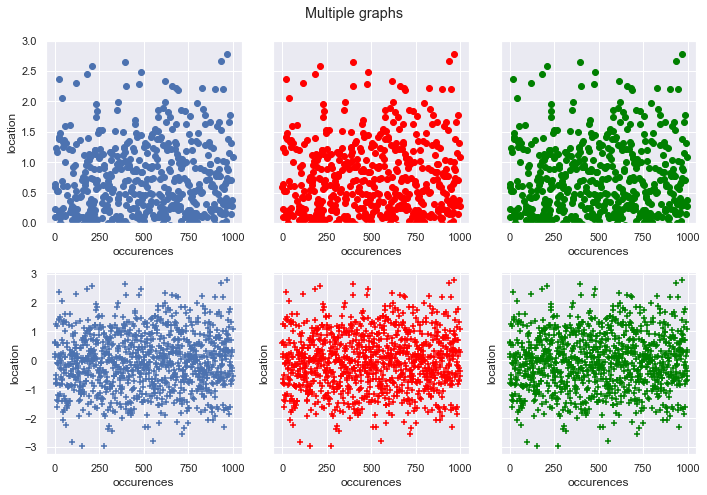

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7), sharey='row')
# Plots on first row
axes[0, 0].scatter(x, y)
axes[0, 1].scatter(x, y, c='red')
axes[0, 2].scatter(x, y, c='green')
# Plots on second row
axes[1, 0].scatter(x, y, marker='+')
axes[1, 1].scatter(x, y, marker='+', c='red')
axes[1, 2].scatter(x, y, marker='+', c='green')

# Title 
fig.suptitle('Multiple graphs')

# Label 1 (for top left plot)
axes[0, 0].set_xlabel('occurences')
axes[0, 0].set_ylabel('location')
# croping the axis will benefit to other graphs in same row
axes[0, 0].set_ylim(0, 3)

# Label 2
axes[0, 1].set_xlabel('occurences')
# Label 3
axes[0, 2].set_xlabel('occurences')
# Label 4
axes[1, 0].set_xlabel('occurences')
axes[1, 0].set_ylabel('location')
# Label 5
axes[1, 1].set_xlabel('occurences')
axes[1, 1].set_ylabel('location')
# Label 6
axes[1, 2].set_xlabel('occurences')
axes[1, 2].set_ylabel('location')

fig.tight_layout()

#### Seaborn

##### Approche manuelle

Une approche consiste à utiliser les *subplots* de *Matplotlib*, et d'y insérer des graphs constitués avec *Seaborn*

<AxesSubplot:>

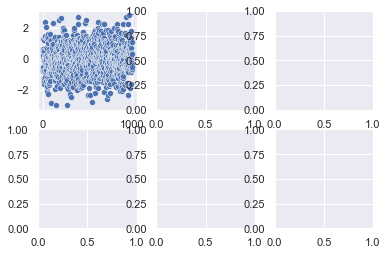

In [35]:
fig, axes = plt.subplots(2, 3)
sns.scatterplot(ax=axes[0, 0], x=x, y=y)

Avec l'utilisation d'une DataFrame plutôt que des Numpy arrays :
- x et y attendent les noms des colonnes de la DataFrame
- et non plus les séries de données comme dans l'exemple précédent

<AxesSubplot:xlabel='x', ylabel='y'>

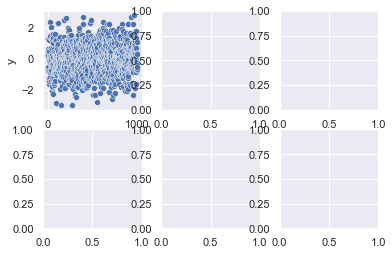

In [37]:
fig, axes = plt.subplots(2, 3)
sns.scatterplot(ax=axes[0, 0], data=df, x='x', y='y')

##### Approche automatique

Une approche plus directe cependant repose sur l'utilisation des grilles *Faceted* de *Seaborn*
- Il s'agit d'un objet qui repose sur les subplots
- mais apporte des fonctionnalités pré-configurées

Il est possible d'utiliser ces grilles *Faceted* sans même les nommer
- en passant plus simplement par la fonction *relplot*
- elle se charge de créer la figure avec multiples cellules
- et d'y insérer les graphs correspondants

In [58]:
# Rappelez-vous des colonnes de notre DataFrame
df.head(3)

,x,y,colors,cat
0,0,0.383344,4,0
1,1,-0.742345,3,0
2,2,0.263076,4,1


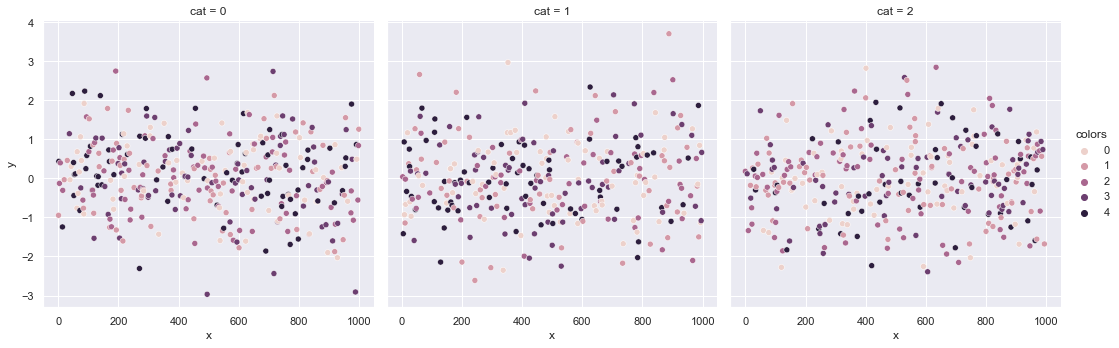

In [60]:
sns.relplot(data=df, x='x', y='y', hue='colors', col='cat')

Il est aussi possible d'obtenir un graph pour chaque paire de variables avec *pairplot*

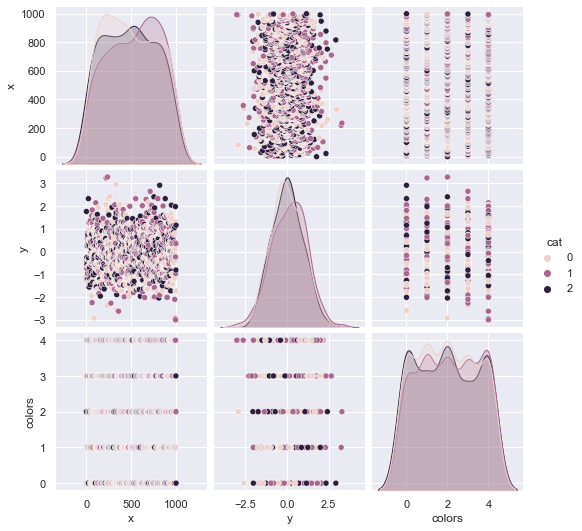

In [57]:
sns.pairplot(df, hue='cat', height=2.5)

##### Approche semi-automatique

Pour davantage de contrôle, il est possible d'utiliser :
- *"PairGrid"* pour présenter les relations de paires de variables
- *"FacetGrid"* pour présenter une même variables conditionnée par d'autres variables (groupby)

Il s'agit alors de décomposer en plusieurs étapes comme avec matplotlib:
- une première création de la grille
- l'attribution de graphs aux différentes parties de la grille

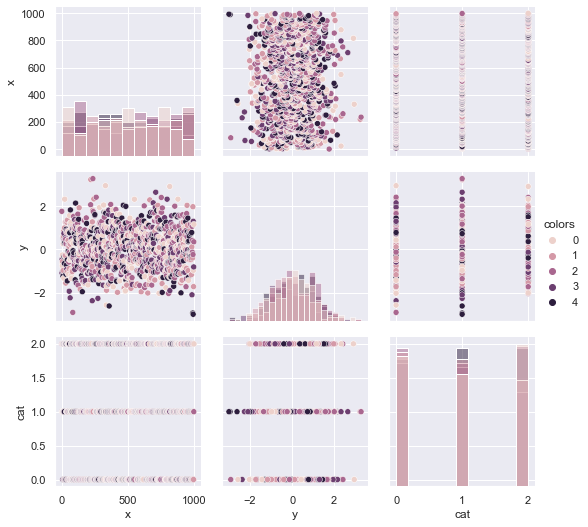

In [ ]:
# Pour les paires de variables
g = sns.PairGrid(df, hue="colors")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

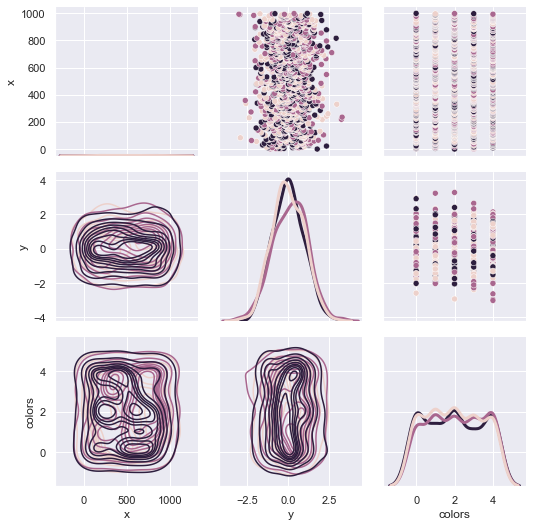

In [ ]:
# Contrôle diagonale, partie haute, partie basse
g = sns.PairGrid(df, hue='cat')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

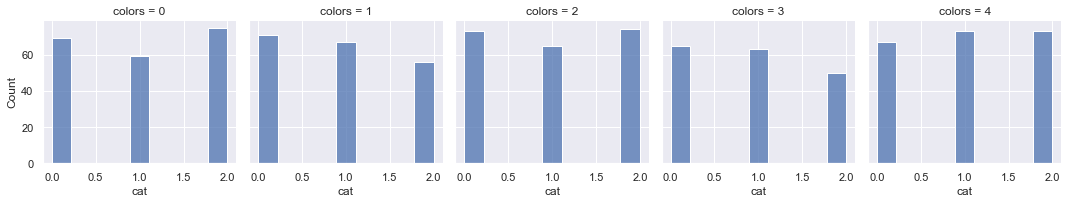

In [64]:
# Pour l'affichage conditionnel d'une même variable
g = sns.FacetGrid(df, col="colors")
g.map(sns.histplot, "cat")

Pour davantage d'exemples et d'explications: https://seaborn.pydata.org/tutorial/axis_grids.html

## Dépendances entre les packages

## Graphs au design plus complexe

## Autres types de données: audio, image, 3D

## Présentation des exercices de l'après-midi

## Conclusion